## Grover's algorithm as a coined QW on the complete graph

In [1]:
!echo $USER, $HOSTNAME
!date
!export OMP_NUM_THREADS=3

bidu, pc013047
Wed Nov 19 11:26:41 -03 2025


In [2]:
!echo OMP_NUM_THREADS=$OMP_NUM_THREADS
import numpy as np
import networkx as nx
import hiperwalk as hpw
myHPC_option=None
myHPC_option="cpu"
import os
os.environ["OMP_NUM_THREADS"] = "2" 

hpw.set_hpc(myHPC_option)

OMP_NUM_THREADS=3
BD, em def set_hpc(hpc), hpc= cpu
lib_name = /home/bidu/hiperblas/lib/libhiperblas-cpu-bridge.so
BD, em ./pyhiperblas/hiperblas_wrapper.c: static PyObject* py_init_engine, lib_name =/home/bidu/hiperblas/lib/libhiperblas-cpu-bridge.so
em src/libhiperblas.c: void load_plugin(bridge_manager_t *manager, char* library_name, int index) {
so bridge library name: /home/bidu/hiperblas/lib/libhiperblas-cpu-bridge.so, 


#### Defining an instance of the complete graph with loops using NetworkX

In [3]:
N = 100
K_N = nx.complete_graph(N)
A = nx.adjacency_matrix(K_N)+np.eye(N)
graph = hpw.Graph(A)

#### Creating an instance of a coined QW

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "2" 
qw = hpw.Coined(graph, shift='flipflop', coin='G', marked={'-G': [0]})

em coined.py, __init__
_set_shift     :   Tempo decorrido: 0.208206 segundos
_set_coin      :   Tempo decorrido: 0.000018 segundos
_set_marked    :   Tempo decorrido: 0.000062 segundos
BD, em hiperwalk/quantum_walk/coined.py: def _set_evolution
BD, em _set_evolution, CALL  C = self.get_coin(), monta a matriz CSR 
++++++  em hiperwalk/quantum_walk/coined.py: get_coin(self)
em get_coin: self._coin= ['grover', 'grover', 'grover', 'grover', 'grover']
em get_coin: scipy.sparse.issparse(self._coin) = False
em get_coin(self), semi-final 
coin_list[:5]= ['minus_grover', 'grover', 'grover', 'grover', 'grover']
em def _coin_list_to_explicit_coin, blocks[0].dtype= float64
type(S.indices)   =  <class 'numpy.ndarray'>
S.indices.dtype   =  int64
indices contiguous:  True
S.indptr.dtype    =  int64
indptr contiguous :  True
type(S)           =  <class 'scipy.sparse._csr.csr_array'>
S.dtype           =  int8
S.data.dtype      =  int8
data contiguous   :  True
type(C.indices)   =  <class 'numpy.ndarray

#### Simulating the QW

In [5]:
optimal_time = round(np.pi*np.sqrt(N)/2)
initial_state = qw.uniform_state()
aRang=(0, 2*optimal_time)
aRang=(0, 1, 1)
states = qw.simulate(range =aRang, state = initial_state)

BD, em hiperwalk/quantum_walk/quantum_walk.py:    def simulate
BD, start=0, end=1, step=1
em quantum_walk.py: def _prepare_engine(self, state, hpc =  cpu
BD, em hiperwalk/quantum_walk/_pyhiperblas_interface.py: def send_matrix(M)
BD, M.dtype= float64 , np.complexfloating= <class 'numpy.complexfloating'>
BD, em hiperwalk/quantum_walk/_pyhiperblas_interface.py: def _send_sparse_matrix(M)
M.dtype= float64 , np.complexfloating= <class 'numpy.complexfloating'>
BD, is_complex=False
BD, hiperblas.COMPLEX=3
BD, hiperblas.FLOAT=2
BD, em simulate, initial state, state= [ 0.010  0.010  0.010 ...  0.010  0.010  0.010];  BD, em pyhiperblas/hiperblas_wrapper.c: py_sparse_matrix_new( PyObject* self, PyObject* args) 
 call bridge_manager.bridges[bridge_index].smatrix_new(rows, cols, data_type);
BD, em /mnt/c/Users/bidu/OneDrive/aLncc/passeiosQuantNov25/hiperwalk/hiperblas-core/src/libhiperblas-cpu-bridge-smatrix.c, smatrix_new
 before CALL PyObject* po = PyCapsule_New((void*)a, py_sparse_matrix_new, p

WhileIt  : Tempo decorrido: 0.000001 segundos


#### Calculating the success probability in a range that includes the optimal time

In [6]:
list_probs = qw.success_probability(states)

#### Ploting the success probability as a function of the number of steps

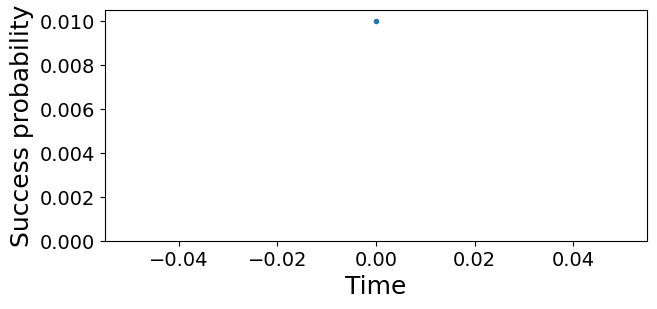

In [7]:
hpw.plot_success_probability(aRang, list_probs, marker = '.', figsize = (7,3))